In [1]:
import os
import sys

current_directory = os.getcwd()
path_components = current_directory.split(os.path.sep)
main_directory = os.path.sep.join(path_components[:-1])
code_directory = os.path.join(main_directory,'code')
sys.path.insert(0,code_directory)
simulation_name = os.path.join(current_directory,'tutorial.py')
print(simulation_name)

/home/martinachondo/PINN/tutorials/tutorial.py


In [2]:
from Simulation import Simulation
import tensorflow as tf

# Create simulation object
simulation = Simulation(simulation_name)

# Equation to solve
simulation.equation = 'standard'
simulation.pbe_model = 'linear'

# Domain properties
simulation.domain_properties = {
        'molecule': 'born_ion',
        'epsilon_1':  1,
        'epsilon_2': 80,
        'kappa': 0.125,
        'T' : 300 
        }

# Mesh properties
simulation.mesh_properties = {
        'vol_max_interior': 0.04,
        'vol_max_exterior': 0.1,
        'density_mol': 40,
        'density_border': 4,
        'dx_experimental': 2,
        'N_pq': 100,
        'G_sigma': 0.04,
        'mesh_generator': 'msms',
        'dR_exterior': 8
        }
simulation.sample_method='random_sample'

# Frecuency of solvation energy calculation
simulation.G_solve_iter=1000

# Losses to add, and initial weights
simulation.losses = ['R1','R2','D2','I','K1','K2']
simulation.weights = {
        'E2': 10**-10,
        }

# Weights adapting algorithm inputs
simulation.adapt_weights = True,
simulation.adapt_w_iter = 1000
simulation.adapt_w_method = 'gradients'
simulation.alpha_w = 0.7

# Architecture
simulation.network = 'xpinn'
simulation.hyperparameters_in = {
        'input_shape': (None,3),
        'num_hidden_layers': 4,
        'num_neurons_per_layer': 20,
        'output_dim': 1,
        'activation': 'tanh',
        'adaptative_activation': True,
        'architecture_Net': 'FCNN',
        'fourier_features': True,
        'num_fourier_features': 12
        }
simulation.hyperparameters_out = {
        'input_shape': (None,3),
        'num_hidden_layers': 4,
        'num_neurons_per_layer': 20,
        'output_dim': 1,
        'activation': 'tanh',
        'adaptative_activation': True,
        'architecture_Net': 'FCNN',
        'fourier_features': False
        }

# Optimizer properties
simulation.optimizer = 'Adam'
simulation.lr = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=0.001,
                decay_steps=2000,
                decay_rate=0.9,
                staircase=True)
simulation.lr_p = 0.001

# Solve parameters
simulation.N_iters = 2

simulation.precondition = False
simulation.N_precond = 3
simulation.iters_save_model = 6



In [3]:
simulation.create_simulation()
simulation.adapt_simulation()

/home/martinachondo/PINN/code/Mesh/Mesh_softwares/MSMS/msms -if /home/martinachondo/PINN/code/Molecules/born_ion/born_ion.xyzr -of /home/martinachondo/PINN/code/Molecules/Saved_meshes/Temp/born_ion_d40 -p 1.4 -d 40 -no_header
MSMS 2.6.1 started on tulio
Copyright M.F. Sanner (1994)
Compilation flags -O2 -DVERBOSE -DTIMING
Atom 2 ignored, radius = 0.010000
INPUT  /home/martinachondo/PINN/code/Molecules/born_ion/born_ion.xyzr 1 spheres 0 collision only, radii  1.000 to  1.000
PARAM  Probe_radius  1.400 density 40.000 hdensity  3.000
REDUCED SURFACE ...
    1 free vertex (vertices) found
    RS component  #faces  #edges #free_edges  #vertices   genus
         0           0        1          0          1      1
    Time Reduced Surface real: 0.00 user: 0.00 sys: 0.00
ANALYTICAL SOLVENT EXCLUDED SURFACE...
    Component   0
        Time Surface real: 0.00 user: 0.00 sys: 0.00
    SES comp.  #fac.  #edg. #s_edg. #vert. #s_vert. R_h C_h genus
         0        1      0      0       0        0

In [4]:
simulation.solve_model()

Loss: 1.0000e+02:   0%|          | 0/2 [00:00<?, ?it/s]

Loss: 1.0000e+02: 100%|██████████| 2/2 [00:14<00:00,  7.19s/it]


In [5]:
Post = simulation.postprocessing(jupyter=True)

OpenMesh not available
No module named 'openmesh'


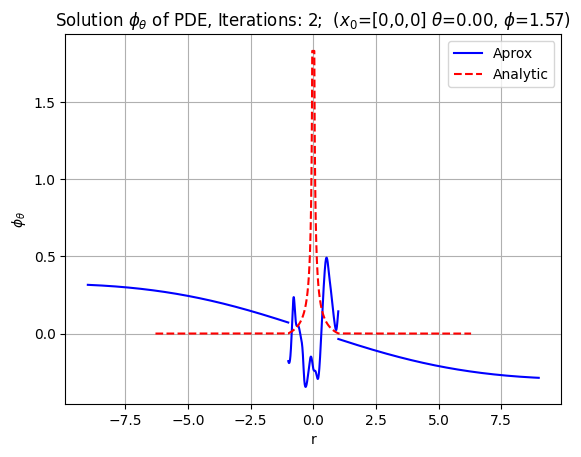

In [6]:
Post.plot_aprox_analytic()